In [2]:
import pandas as pd

In [6]:
#CAU 1: ĐỌC VÀ HIỂN THÔNG TIN
df = pd.read_csv("D:/All about HUB/NAM 2/HK 2/python/DO AN CUOI KY/vnstock_listing_companies.csv")

In [16]:
# IN RA DANH SÁCH CÁC CỘT
columns = df.columns.tolist()
num_columns = len(columns)

In [17]:
print("Danh sách các cột: ")
for i in range( 0, num_columns, 2):
    cols_to_print = columns[i:i+2]
    print(cols_to_print)

Danh sách các cột: 
['ticker', 'exchange']
['shortName', 'industry']
['industryEn', 'establishedYear']
['noEmployees', 'noShareholders']
['foreignPercent', 'website']
['stockRating', 'outstandingShare']
['issueShare', 'companyType']
['monthlyRecords', 'file_monthly_datas']


In [34]:
#IN RA SỐ DÒNG DỮ LIỆU CỦA BẢNG
num_rows = len(df)
print("Số dòng dữ liệu của bảng: ", num_rows)

Số dòng dữ liệu của bảng:  796


In [31]:
#CÂU 2: VIẾT HÀM FIND STOCK ĐỂ TÌM MÃ SỐ CỔ PHIẾU X DỰA VÀO MSSV
def find_stock(student_id, csv_file="D:/All about HUB/NAM 2/HK 2/python/DO AN CUOI KY/vnstock_listing_companies.csv"):
    df = pd.read_csv(csv_file)
    stock_index = int(student_id[-4:]) % 1000
    stock_code = df.iloc[stock_index]['ticker']  
    return stock_code

In [33]:
#THỰC THI HÀM VỚI MSSV CỦA MÌNH
student_id = '030238220030'
result_stock = find_stock(student_id)
print("Mã số cổ phiếu tương ứng với MSSV", student_id, "là:", result_stock)

Mã số cổ phiếu tương ứng với MSSV 030238220030 là: SGR


In [42]:
#CÂU 3: VIẾT HÀM TICKER DETAIL IN 1 MÃ CỔ PHIẾU BẤT KỲ
def ticker_detail(ticker_code, csv_file="D:/All about HUB/NAM 2/HK 2/python/DO AN CUOI KY/vnstock_listing_companies.csv"):
    df = pd.read_csv(csv_file)
    ticker_info = df.loc[df['ticker'] == ticker_code]
    if not ticker_info.empty:
        print("Thông tin của mã cổ phiếu", ticker_code)
        print("Mã cổ phiếu (ticker):", ticker_info.iloc[0]['ticker'])
        print("Tên cổ phiếu(shortName):", ticker_info.iloc[0]['shortName'])
        print("Nơi lưu trữ lịch sử giao dịch (monthlyRecords):", ticker_info.iloc[0]['monthlyRecords'])
    else:
        print("Không tìm thấy thông tin cho mã cổ phiếu", ticker_code)

In [43]:
#THỰC THI HÀM VỚI MÃ CỔ PHIẾU Ở CÂU 2
ticker_code = result_stock
ticker_detail(ticker_code)

Thông tin của mã cổ phiếu SGR
Mã cổ phiếu (ticker): SGR
Tên cổ phiếu(shortName): Địa ốc Sài Gòn
Nơi lưu trữ lịch sử giao dịch (monthlyRecords): SGR.csv


In [60]:
#CÂU 4:THỐNG KÊ SỐ LẦN PHÁT SINH GIAO DỊCH
def stock_trading_stats(ticker_code, trading_data_file="D:/All about HUB/NAM 2/HK 2/python/DO AN CUOI KY/transaction-20240415T010839Z-001/transaction/SGR.csv"):
    trading_df = pd.read_csv(trading_data_file)
    filtered_df = trading_df[(trading_df['ticker'] == ticker_code) & (trading_df['time'].str.startswith('2024-02')) | (trading_df['time'].str.startswith('2024-03'))]
    if filtered_df.empty:
        print("Không có giao dịch nào cho mã cổ phiếu này", ticker_code,"trong khoảng thời gian từ tháng 2 đến tháng 3 năm 2024")
        return
    num_trades = filtered_df.shape[0]
    avg_close_price = filtered_df['close'].mean()
    max_close_price = filtered_df['close'].max()
    min_close_price = filtered_df['close'].min()
    print("Thống kê giao dịch cho mã cổ phiếu", ticker_code, "trong khoảng thời gian từ tháng 2 đến hết tháng 3 năm 2024:")
    print("Số lần phát sinh giao dịch:", num_trades)
    print("Giá Close trung bình:", avg_close_price)
    print("Giá Close cao nhất:", max_close_price)
    print("Giá Close thấp nhất:", min_close_price)
ticker_code = 'SGR'
stock_trading_stats(ticker_code)

Thống kê giao dịch cho mã cổ phiếu SGR trong khoảng thời gian từ tháng 2 đến hết tháng 3 năm 2024:
Số lần phát sinh giao dịch: 37
Giá Close trung bình: 20439.18918918919
Giá Close cao nhất: 21200
Giá Close thấp nhất: 19800


In [62]:
#CÂU 5: THÊM CỘT INFO 01
trading_df = pd.read_csv("D:/All about HUB/NAM 2/HK 2/python/DO AN CUOI KY/transaction-20240415T010839Z-001/transaction/SGR.csv")
trading_df['info01'] = trading_df.apply(lambda row: 1 if row['close'] > row['open'] else (-1 if row['close'] < row['open'] else 0), axis=1)
print(trading_df)

          time   open   high    low  close  volume ticker  info01
0   2024-01-02  19450  19550  19450  19450   11700    SGR       0
1   2024-01-03  19350  19500  19350  19500   14700    SGR       1
2   2024-01-04  19500  19550  19400  19500   43900    SGR       0
3   2024-01-05  19800  19800  19450  19700   17400    SGR      -1
4   2024-01-08  19700  19800  19500  19500   23900    SGR      -1
..         ...    ...    ...    ...    ...     ...    ...     ...
62  2024-04-04  21700  22450  21300  22300   58600    SGR       1
63  2024-04-05  22200  22200  21550  21950   42400    SGR      -1
64  2024-04-08  21300  21350  20500  20500  110300    SGR      -1
65  2024-04-09  20100  20500  19850  20050  142900    SGR      -1
66  2024-04-10  20000  21450  20000  20750   27400    SGR       1

[67 rows x 8 columns]


In [69]:
#CÂU 6: THÊM CỘT INFO 02
info02_values = [0] 
for i in range(1, len(trading_df)):
    close_diff = trading_df.iloc[i]['close'] - trading_df.iloc[i-1]['close']
    if close_diff > 0:
        info02_values.append(1)
    elif close_diff < 0:
        info02_values.append(-1)
    else:
        info02_values.append(0)
trading_df['info02'] = info02_values
print(trading_df)
#xuất file SGR.csv
output_filename = "SGR_Stock.csv"
trading_df.to_csv(output_filename, index=False)
print("Đã lưu thông tin vào file", output_filename)

          time   open   high    low  close  volume ticker  info01  info02
0   2024-01-02  19450  19550  19450  19450   11700    SGR       0       0
1   2024-01-03  19350  19500  19350  19500   14700    SGR       1       1
2   2024-01-04  19500  19550  19400  19500   43900    SGR       0       0
3   2024-01-05  19800  19800  19450  19700   17400    SGR      -1       1
4   2024-01-08  19700  19800  19500  19500   23900    SGR      -1      -1
..         ...    ...    ...    ...    ...     ...    ...     ...     ...
62  2024-04-04  21700  22450  21300  22300   58600    SGR       1       1
63  2024-04-05  22200  22200  21550  21950   42400    SGR      -1      -1
64  2024-04-08  21300  21350  20500  20500  110300    SGR      -1      -1
65  2024-04-09  20100  20500  19850  20050  142900    SGR      -1      -1
66  2024-04-10  20000  21450  20000  20750   27400    SGR       1       1

[67 rows x 9 columns]
Đã lưu thông tin vào file SGR_Stock.csv


In [84]:
#CÂU 7: VẼ CÁC ĐƯỜNG OPEN,LOW, HIGH,CLOSE
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

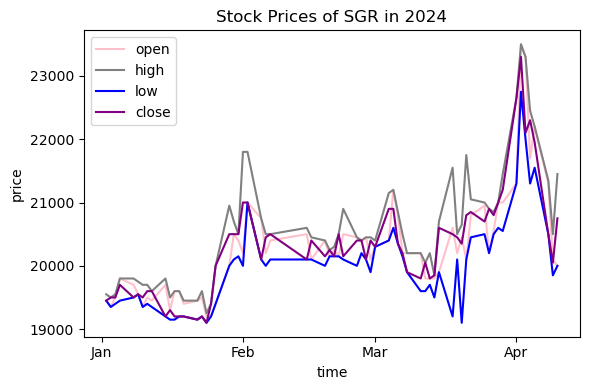

In [112]:
df = pd.read_csv("C:/Users/X/SGR_Stock.csv")
df['time'] = pd.to_datetime(df['time'])
#VẼ ĐỒ THỊ
plt.figure(figsize=(6,4))
plt.plot(df['time'], df['open'], label='open', color='pink')
plt.plot(df['time'], df['high'], label='high', color='grey')
plt.plot(df['time'], df['low'], label='low', color='blue')
plt.plot(df['time'], df['close'], label='close', color='purple')
#TIÊU ĐỀ
plt.title('Stock Prices of SGR in 2024')
plt.xlabel('time')
plt.ylabel('price')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.legend() 
plt.tight_layout() 
plt.show()

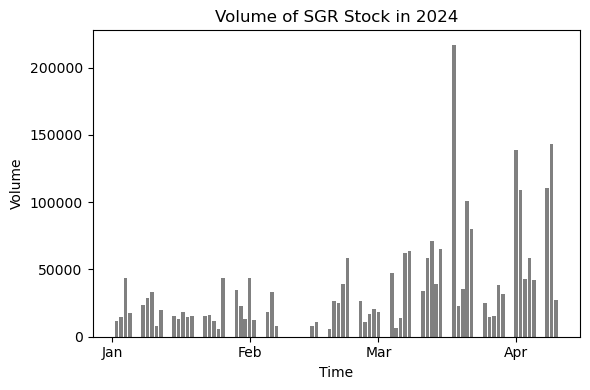

In [111]:
#CÂU 8: VẼ BIỂU ĐỒ DẠNG CỘT CHỨA THÔNG TIN VOLUME
df = pd.read_csv("C:/Users/X/SGR_Stock.csv")
df['time'] = pd.to_datetime(df['time'])
#ĐỒ THỊ
plt.figure(figsize=(6,4))
plt.bar(df['time'], df['volume'], color='grey')
plt.title('Volume of SGR Stock in 2024')
plt.xlabel('Time')
plt.ylabel('Volume')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.tight_layout()
plt.show()

In [94]:
#CÂU 9: XÂY DỰNG MÔ HÌNH HỒI QUY TUYẾN TÍNH
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [104]:
df = pd.read_csv("C:/Users/X/SGR_Stock.csv")
#NHẬP BIẾN
X = df[['volume']]  
y = df['close']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#XÂY DỰNG MÔ HÌNH HỒI QUY
model = LinearRegression()
model.fit(X, y)
#ĐÁNH GIÁ
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
#DỰ ĐOÁN
predicted_close = model.predict(X_test)
predicted_df = pd.DataFrame({'volume': X_test['volume'], 'Actual_close': y_test, 'Predicted_close': predicted_close})
predicted_df.to_csv("Predicted_Close.csv", index=False)
print(predicted_df)

Mean Squared Error: 742126.877918465
    volume  Actual_close  Predicted_close
36   17200         20100     20119.391167
16   11700         19100     20071.100756
4    23900         19500     20178.217667
9    15500         19200     20104.465040
45   58600         20050     20482.886260
40    6300         20900     20023.688352
61   42600         22100     20342.405065
5    29000         19550     20222.996048
64  110300         20500     20936.816123
12   14400         19200     20094.806957
25   33400         20450     20261.628377
59  138600         22650     21185.292238
28   10900         20400     20064.076696
0    11700         19450     20071.100756


In [110]:
#CÂU 10: TỪ MÔ HÌNH TRÊN NHẬP 10 GIÁ TRỊ VOLUME ĐỂ DỰ ĐOÁN GIÁ CLOSE
import pandas as pd
from sklearn.linear_model import LinearRegression
df = pd.read_csv("C:/Users/X/SGR_Stock.csv")
model = LinearRegression()
X = df[['volume']]  
y = df['close']
model.fit(X, y)
volumes = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
predicted_close = model.predict([[volume] for volume in volumes])
prediction_df = pd.DataFrame({'volume': volumes, 'Predicted_close': predicted_close})
print(prediction_df)

   volume  Predicted_close
0   10000     20056.174629
1   20000     20143.975376
2   30000     20231.776123
3   40000     20319.576870
4   50000     20407.377618
5   60000     20495.178365
6   70000     20582.979112
7   80000     20670.779859
8   90000     20758.580607
9  100000     20846.381354


C:\Users\X\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
